In [66]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Import external functions from the functions folder
import sys
sys.path.append('../functions')
from functions import functions as f

In [2]:
# Set local path to the folder containing the .wav audio files
path = 'C:/Users/lucvo/VScode/Machine_learning/Audio_data/nsynth-valid.jsonwav/nsynth-valid/audio/'

In [64]:
filename = 'bass_electronic_018-022-025.wav'

# Read the audio file using scipy
audio_waveform, audio_framerate = f.read_wav_file_scipy(path + filename)

# Create the spectrogram
freqs, times, spectrogram = f.create_spectrogram(audio_waveform, audio_framerate)

In [65]:
# Create a training set of spectrograms and labels
X_train, y_train, label_dict = f.create_single_inst_classification_set(N_samples=1000, classes=['keyboard','bass','flute', 'guitar'], path=path)

In [62]:
print(X_train.shape)
print(y_train.shape)
print(label_dict)

(1000, 36765)
(1000,)
{0: 'keyboard', 1: 'bass', 2: 'flute', 3: 'guitar'}


In [48]:
print(X_train[:5])

[[-0.2637209  -0.29806834 -0.34098127 ... -0.16397429 -0.26834658
  -0.16654642]
 [-0.23745961 -0.2902222  -0.34317127 ... -0.19755444 -0.26834658
  -0.16654642]
 [ 1.0182042   1.1595278  -0.32559404 ... -0.19755444 -0.26834658
  -0.16654642]
 [ 1.0121725   8.784968    2.8755798  ... -0.19755444 -0.26834658
  -0.16654642]
 [-0.22080716 -0.26199827 -0.33897007 ... -0.19755444 -0.26834658
  -0.16654642]]


In [32]:
# Scale the data
import sklearn.preprocessing

scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
# Train a tensorflow neural network to classify the instruments
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

c:\Users\lucvo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Fit the model
model.fit(X_train, y_train, epochs=50)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8808 - loss: 0.2766
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8833 - loss: 0.2434
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9213 - loss: 0.1823
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9254 - loss: 0.1905
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9261 - loss: 0.1846
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9425 - loss: 0.1418
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9072 - loss: 0.2240
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9293 - loss: 0.1531
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9363 - loss: 0.1307
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9569 - loss: 0.1104
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9395 - loss: 0.1303
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy:

In [36]:
# Generate a test set
X_test, y_test, _ = create_single_inst_classification_set(N_samples=100, classes=['keyboard','bass','flute'], path=path)

# Scale the test data
X_test = scaler.transform(X_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6939 - loss: 1.5660  
Test accuracy: 0.6800000071525574


In [45]:
# Create a prediction array for the test set
y_pred = model.predict(X_test)

# Convert the prediction array to a class label
y_pred_labels = np.argmax(y_pred, axis=1)

print(y_pred_labels)
print()
print(y_test)

# Print the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_labels)
print()
print(conf_matrix)

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print('Accuracy:', accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[1 1 1 2 0 0 2 0 1 0 0 0 1 1 0 2 0 1 2 1 2 0 1 2 1 2 1 1 1 0 1 1 2 1 2 0 2
 0 1 0 1 0 1 0 1 2 1 2 1 1 0 0 1 2 2 1 2 1 0 1 1 1 1 0 2 0 2 1 2 1 1 1 0 2
 1 1 1 1 1 0 1 1 2 0 1 0 2 1 0 1 0 1 0 1 0 1 0 1 1 0]

[1 0 0 2 0 1 2 0 0 0 0 0 0 0 0 2 1 1 2 1 2 0 1 2 1 2 0 1 0 0 1 1 2 2 2 0 2
 0 1 0 1 1 1 0 1 2 0 2 0 0 1 0 1 2 2 0 2 0 0 1 1 0 0 0 2 0 2 1 2 1 1 1 1 2
 1 1 0 1 1 1 1 2 2 1 1 1 2 0 1 0 0 1 0 0 0 0 0 0 0 0]

[[21 21  0]
 [ 9 26  0]
 [ 0  2 21]]
Accuracy: 0.68


### Use a XGBoost decision tree

In [57]:
# Define the test set
X_val, y_val, _ = create_single_inst_classification_set(N_samples=100, classes=['keyboard','bass','flute','guitar'], path=path)


c:\Users\lucvo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\lucvo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.20700	validation_1-merror:0.40000
[1]	validation_0-merror:0.18200	validation_1-merror:0.37000
[2]	validation_0-merror:0.17600	validation_1-merror:0.39000
[3]	validation_0-merror:0.16800	validation_1-merror:0.36000
[4]	validation_0-merror:0.15800	validation_1-merror:0.37000
[5]	validation_0-merror:0.14900	validation_1-merror:0.37000
[6]	validation_0-merror:0.14800	validation_1-merror:0.37000
[7]	validation_0-merror:0.14600	validation_1-merror:0.36000
[8]	validation_0-merror:0.14300	validation_1-merror:0.37000
[9]	validation_0-merror:0.14100	validation_1-merror:0.36000
[10]	validation_0-merror:0.13700	validation_1-merror:0.37000
[11]	validation_0-merror:0.13700	validation_1-merror:0.38000
[12]	validation_0-merror:0.12800	validation_1-merror:0.34000
[13]	validation_0-merror:0.11800	validation_1-merror:0.35000
[14]	validation_0-merror:0.11100	validation_1-merror:0.37000
[15]	validation_0-merror:0.10500	validation_1-merror:0.35000
[16]	validation_0-merror:0.09600	v

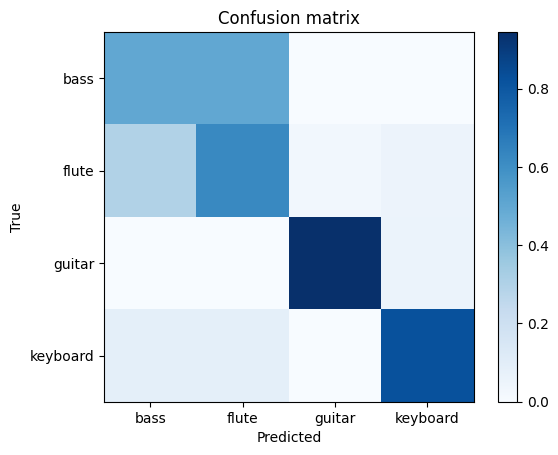

In [58]:
# Use an XGBoost classifier
import xgboost as xgb

model = xgb.XGBClassifier(objective='multi:softmax', num_class=4, n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1)

# Fit the model and store training accuracy as function of number of trees
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train, y_train, eval_metric='merror', eval_set=eval_set, early_stopping_rounds=10, verbose=True)

# Predict the labels of the validation set
y_pred = model.predict(X_val)

# Print the accuracy
accuracy = np.sum(y_pred == y_val) / len(y_val)
print('Accuracy:', accuracy)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
conf_normed = conf_matrix / np.sum(conf_matrix, axis=1)[:, np.newaxis]
plt.imshow(conf_normed, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1, 2, 3], ['bass', 'flute', 'guitar', 'keyboard'])
plt.yticks([0, 1, 2, 3], ['bass', 'flute', 'guitar', 'keyboard'])
plt.title('Confusion matrix')
plt.show()